## This notebook is just extra EDA I performed but did not inlcude in the lab so as not to take up your time scrolling

## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/annamitchell/Desktop/GA_Docs/Datasets/data.csv', sep = '\t')

In [14]:
#df.dtypes they are all int64

In [4]:
df['engnat'].head()

0    1
1    1
2    2
3    1
4    1
Name: engnat, dtype: int64

- engnat	" Is English you native language?" 1=Yes, 2=No
- age	"What is your age?", entered as text (ages <  13 not recorded)
- education	"How much education have you completed?" 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree
- gender	1=Male, 2=Female, 3=Other
- orientation	1=Heterosexual, 2=Bisexual, 3=Homosexual, 4=Asexual, 5=Other
- race	1=Mixed race, 2=Asian, 3=Black, 4=Native American, 5=Native Australian, 6=White, 7=Other
- religion	1=Atheist/Agnostic, 2=Christian, 3=Muslim, 4=Jewish, 5=Hindu, 6=Buddhist, 7=Other
- hand	"What hand do you use to write with?" 	1=Right, 2=Left, 3=Both

In [5]:
df['engnat'].value_counts()
#1 yes
#2 no

# 0 = 25

#How does all the O's effect our data? 

1    3130
2    1029
0      25
Name: engnat, dtype: int64

In [6]:
df['gender'].value_counts() 
#2 is Female
#1 is Male, 
#3 is Other 
#0 = 82

2    2212
1    1586
3     304
0      82
Name: gender, dtype: int64

In [7]:
df['education'].value_counts() 
#2 is High school
#3 Univeristy Degree
#1 less than high school
#4 Grad degree
#0 = 51

2    2055
3    1086
1     546
4     446
0      51
Name: education, dtype: int64

In [8]:
df['orientation'].value_counts() 
#1 hetero
#2 Bisexual
#5 other...other?
#3 homo
#4 Asexual

# 0 = 123

1    2307
2     833
5     349
3     335
4     237
0     123
Name: orientation, dtype: int64

In [9]:
df['race'].value_counts() 
#6 White
#1 mixed
#2 asian
#7 other
#3 black
#4 native american
#5 native australian 

#0 = 66

6    2793
1     393
2     383
7     342
3     168
0      66
4      33
5       6
Name: race, dtype: int64

In [10]:
df['religion'].value_counts() 
#1 Atheist/Agnostic 
#2 Christian
#7 Other
#6 Buddhist
#3 muslim
#4 Jewish
#5 hindu

#0 = 187

1    1857
2    1222
7     623
0     187
6     103
3      80
4      62
5      50
Name: religion, dtype: int64

In [11]:
df['hand'].value_counts() 
#1 Right
#2 left
#3 both 

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [15]:
df.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3


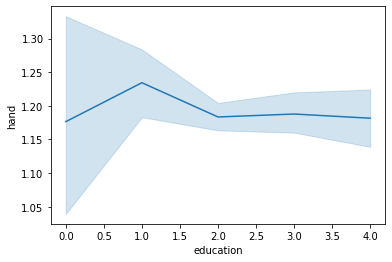

In [24]:
sns.lineplot(x = 'education', y = 'hand', data=df);

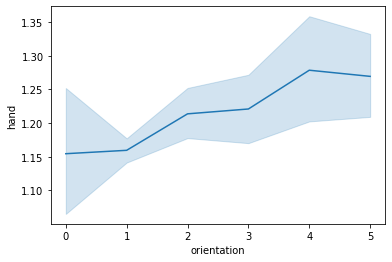

In [23]:
sns.lineplot(x = 'orientation', y = 'hand', data=df);

In [26]:
# Calling .describe() to get an overview of the data in the hand column
df[['hand']].describe()

,hand
count,4184.000000
mean,1.190966
std,0.495357
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [29]:
# Creating a correlation variable for the hand column in relation to the rest of the df

corr = df[df['hand'] == 2].corr().sort_values('hand', ascending=False)

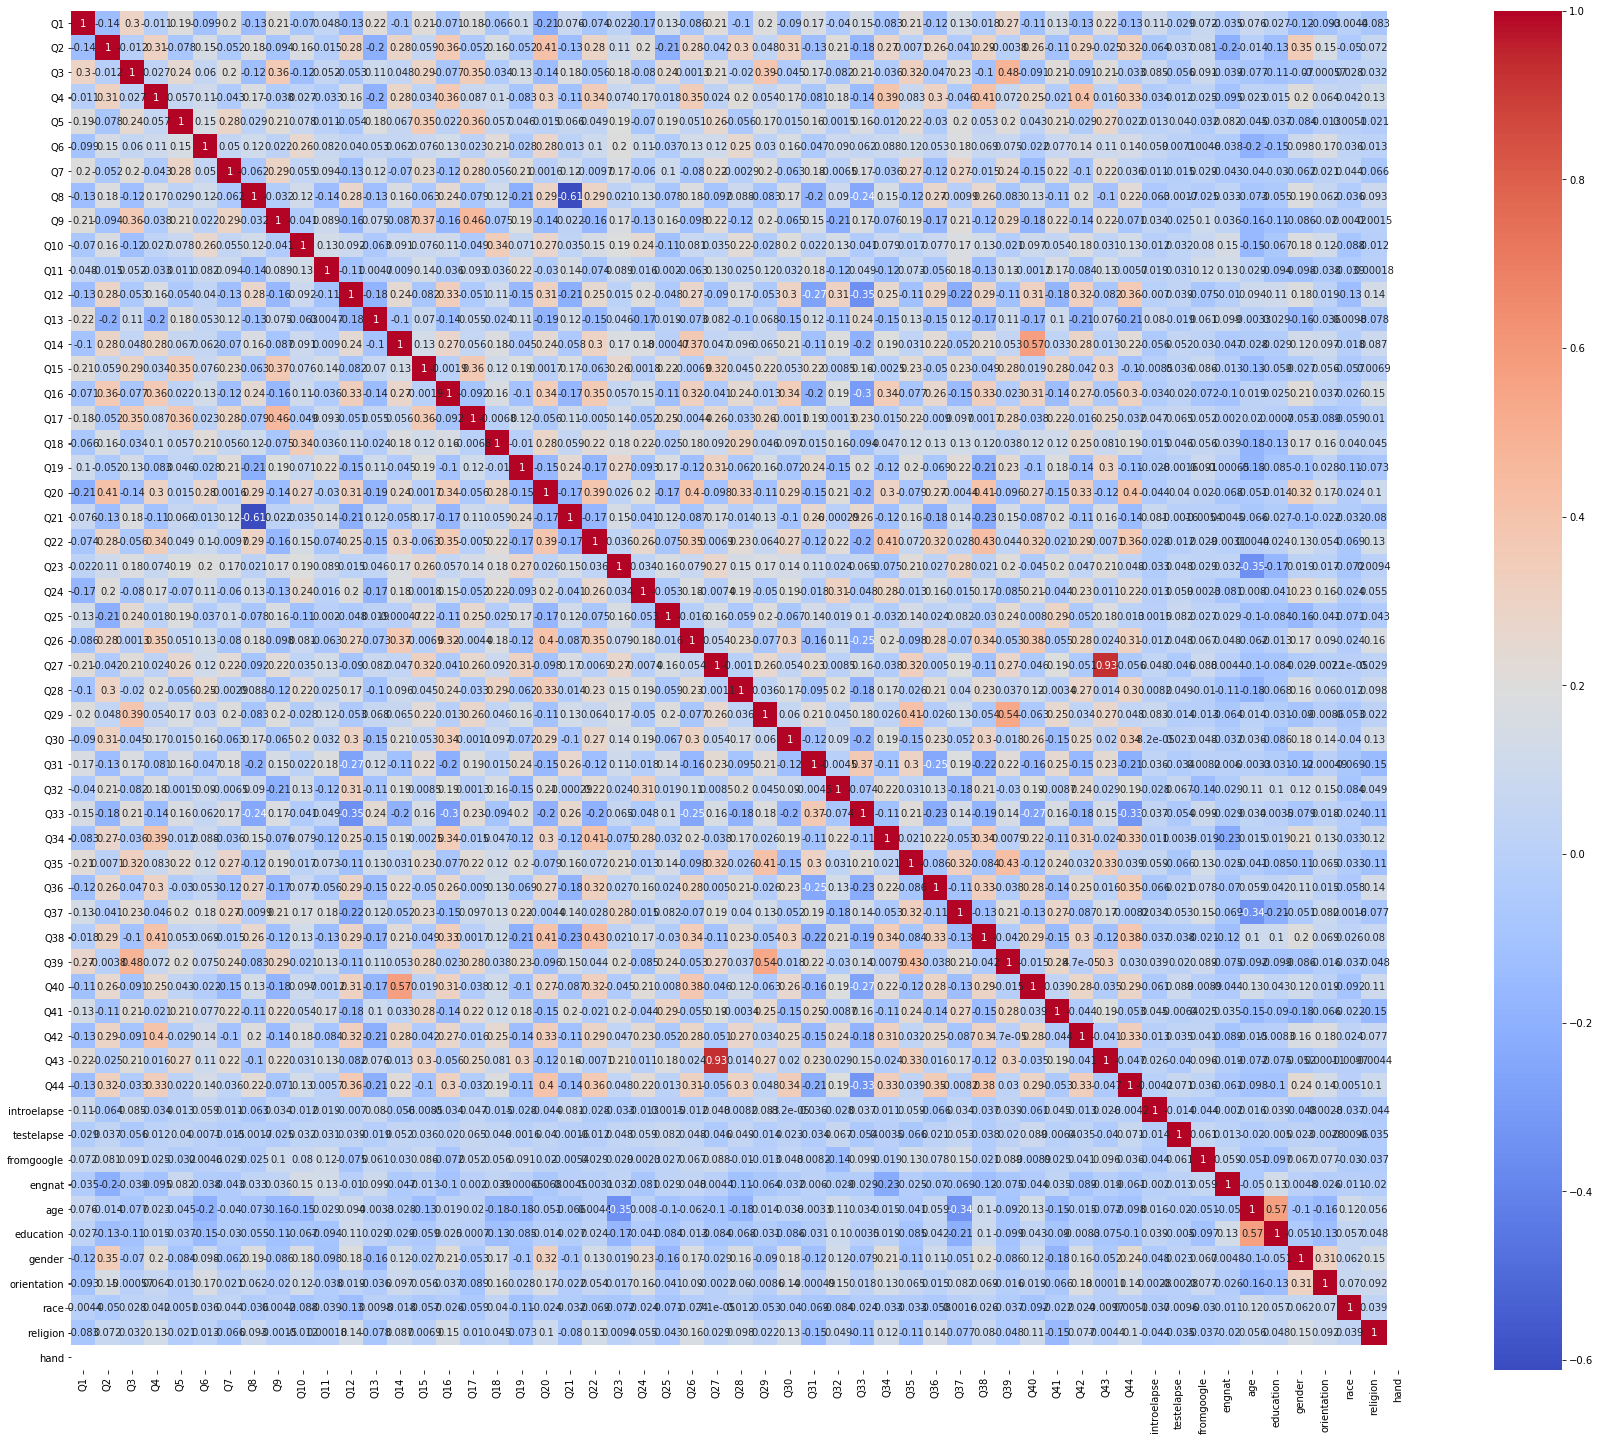

In [34]:
plt.figure(figsize=(30, 25))
sns.heatmap(corr,         
            annot = True, 
            cmap = 'coolwarm');

#yikes that is big 

In [33]:
#q27 and 43  duplicates?? Why such the high correlation? Do we have the same responses? 

df[['hand', 'Q27', 'Q43']].head()

#Looks like the answers are different, so lets keep the columns. 

,hand,Q27,Q43
0,3,5,5
1,1,1,4
2,2,2,2
3,2,1,1
4,3,5,5


In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing

In [ ]:
#label_encoder = LabelEncoder()
#df.loc[:,0] = label_encoder.fit_transform(df.loc[:,0]).astype('float64')

In [ ]:
#this code was borrowed from "https://discuss.analyticsvidhya.com/t/error-could-not-convert-string-to-float-while-running-randomforest-model-in-python/4855/2"

def convert(df):
    number = preprocessing.LabelEncoder()
    df['country'] = number.fit_transform(df.country)
    df=df.fillna(-999)
    return df

In [ ]:
convert(X_train)
convert(X_test)

In [ ]:
lasso = least absolute shrinkage and selection operator 
    - helps in reducing over fitting and in feature selection 